In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
!pip install -q kaggle

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"alexanderyevchenko","key":"67fa16f895578cbabbd614de142946ae"}'}

In [7]:
!cp kaggle.json ~/.kaggle/

In [8]:
!chmod 600 ~/.kaggle/kaggle.json

In [9]:
!kaggle datasets list

ref                                                              title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
ahsan81/hotel-reservations-classification-dataset                Hotel Reservations Dataset                          480KB  2023-01-04 12:50:31           7484        267  1.0              
themrityunjaypathak/most-subscribed-1000-youtube-channels        Most Subscribed 1000 Youtube Channels                28KB  2023-01-21 14:42:05           1470         51  1.0              
senapatirajesh/netflix-tv-shows-and-movies                       Latest Netflix TV shows and movies                    1MB  2023-01-14 17:03:12           2802         75  0.9411765        
ulrikthygepedersen/online-retail-dataset               

In [10]:
!kaggle competitions download -c digit-recognizer

 59% 9.00M/15.3M [00:00<00:00, 94.1MB/s]
100% 15.3M/15.3M [00:00<00:00, 121MB/s] 


In [11]:
!unzip digit-recognizer.zip

Archive:  digit-recognizer.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [13]:
data = pd.read_csv('/content/train.csv')

In [14]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
data = np.array(data)
m, n = data.shape # where m is the number of rows and n is the number of columns
np.random.shuffle(data)

data_val = data[0:1000].T # grab first 1000 examples as val data, transpose
Y_val = data_val[0] # first row is all of the labels
X_val = data_val[1:n] # the rest of the rows are now the pixel values
X_val = X_val / 255.


data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_, m_train = X_train.shape

In [57]:
def init_params():
  W1 = np.random.rand(10, 784) - 0.5
  B1 = np.random.rand(10, 1) - 0.5
  W2 = np.random.rand(10, 10) - 0.5
  B2 = np.random.rand(10, 1) - 0.5
  return W1, B1, W2, B2

def ReLU(Z):
  return np.maximum(Z, 0)

def deriv_ReLU(Z):
  return Z > 0  

def softmax(Z):
  A = np.exp(Z) / sum(np.exp(Z))
  return A

def forward_prop(W1, B1, W2, B2, X):
  Z1 = W1.dot(X) + B1
  A1 = ReLU(Z1)
  Z2 = W2.dot(A1) + B2 
  A2 = softmax(Z2)
  return Z1, A1, Z2, A2

def one_hot(Y):
  one_hot_Y = np.zeros((Y.size, Y.max() + 1))
  one_hot_Y[np.arange(Y.size), Y] = 1
  one_hot_Y = one_hot_Y.T
  return one_hot_Y

def back_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
  one_hot_Y = one_hot(Y)
  dZ2 = A2 - one_hot_Y
  dW2 = 1 / m * dZ2.dot(A1.T)
  dB2 = 1 / m * np.sum(dZ2) 
  dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
  dW1 = 1 / m * dZ1.dot(X.T)
  dB1 = 1 / m * np.sum(dZ1)

  return dW1, dB1, dW2, dB2

def update_params(W1, B1, W2, B2, dW1, dB1, dW2, dB2, alpha):
  W1 = W1 - alpha * dW1
  B1 = B1 - alpha * dB1
  W2 = W2 - alpha * dW2
  B2 = B2 - alpha * dB2

  return W1, B1, W2, B2


In [58]:
def get_predictions(A2):
  return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
  print(predictions, Y)
  return np.sum(predictions == Y) / Y.size  

def gradient_descent(X, Y, iterations, alpha):
  W1, B1, W2, B2 = init_params()
  for i in range(iterations):
    Z1, A1, Z2, A2 = forward_prop(W1, B1, W2, B2, X)
    dW1, dB1, dW2, dB2 = back_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
    W1, B1, W2, B2 = update_params(W1, B1, W2, B2, dW1, dB1, dW2, dB2, alpha)
    if i % 50 == 0:
      print("Iteration: ", i)
      predictions = get_predictions(A2)
      print(get_accuracy(predictions, Y))
  return W1, B1, W2, B2


In [59]:
W1, B1, W2, B2 = gradient_descent(X_train, Y_train, 500, 0.1)

Iteration:  0
[7 8 6 ... 8 8 6] [0 7 2 ... 8 7 8]
0.12548780487804878
Iteration:  50
[0 3 1 ... 8 5 2] [0 7 2 ... 8 7 8]
0.4662439024390244
Iteration:  100
[0 2 1 ... 8 5 3] [0 7 2 ... 8 7 8]
0.6543658536585366
Iteration:  150
[0 2 1 ... 8 7 3] [0 7 2 ... 8 7 8]
0.7315853658536585
Iteration:  200
[0 2 3 ... 6 7 3] [0 7 2 ... 8 7 8]
0.7721463414634147
Iteration:  250
[0 2 3 ... 6 7 3] [0 7 2 ... 8 7 8]
0.7964878048780488
Iteration:  300
[0 2 2 ... 6 7 8] [0 7 2 ... 8 7 8]
0.8144878048780487
Iteration:  350
[0 2 2 ... 6 7 8] [0 7 2 ... 8 7 8]
0.8269756097560975
Iteration:  400
[0 2 2 ... 6 7 8] [0 7 2 ... 8 7 8]
0.8366829268292683
Iteration:  450
[0 2 2 ... 6 7 8] [0 7 2 ... 8 7 8]
0.8438048780487805


In [60]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [0]
Label:  0


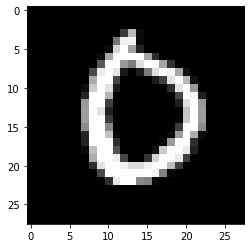

Prediction:  [2]
Label:  7


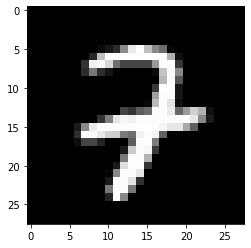

Prediction:  [2]
Label:  2


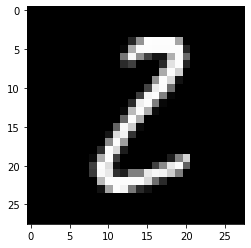

Prediction:  [3]
Label:  3


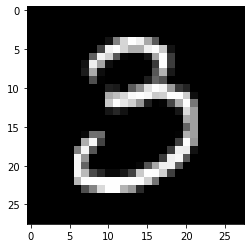

In [61]:
test_prediction(0, W1, B1, W2, B2)
test_prediction(1, W1, B1, W2, B2)
test_prediction(2, W1, B1, W2, B2)
test_prediction(3, W1, B1, W2, B2)

In [62]:
val_predictions = make_predictions(X_val, W1, B1, W2, B2)
get_accuracy(val_predictions, Y_val)

[3 3 0 6 4 7 6 6 8 9 6 0 6 7 8 3 4 1 8 8 6 2 3 7 9 5 7 2 3 1 1 4 6 5 9 8 2
 3 0 1 0 4 4 1 7 3 2 3 3 5 8 8 2 1 3 2 9 1 1 5 0 0 9 0 0 7 6 6 7 5 7 0 7 1
 9 1 7 5 2 7 0 9 5 3 2 3 9 4 3 3 8 4 8 9 0 8 1 5 8 8 5 1 6 1 8 4 9 3 8 3 3
 7 1 8 0 3 8 2 5 2 2 7 2 6 3 7 0 6 1 0 0 7 1 0 5 1 3 7 2 3 3 8 9 8 1 1 5 1
 5 4 1 5 8 7 7 2 6 6 5 8 6 8 2 1 8 7 1 0 6 1 4 4 1 9 7 9 2 5 8 4 7 2 3 8 0
 8 1 9 8 0 8 7 4 0 1 4 1 1 4 0 0 7 3 4 9 6 2 0 4 8 2 3 9 1 9 0 5 2 9 2 7 4
 4 4 4 1 3 5 4 4 2 2 3 8 8 4 8 2 8 8 4 1 3 8 1 4 3 1 0 3 8 3 0 9 7 8 3 9 9
 4 7 0 3 1 6 2 4 1 8 2 3 4 8 3 3 7 5 9 9 5 6 9 0 9 7 8 5 3 3 9 3 2 2 7 4 6
 5 1 8 8 6 5 0 6 4 7 7 0 2 1 8 1 7 3 4 9 0 5 2 1 1 0 3 4 5 8 2 7 2 3 8 1 0
 5 3 9 1 9 0 2 3 5 9 1 2 5 6 3 7 1 3 8 3 6 1 8 2 5 3 1 8 6 7 4 7 7 4 4 8 1
 4 8 8 7 0 7 2 8 6 8 9 7 9 0 5 7 9 5 7 4 8 8 8 3 3 6 1 0 4 4 1 5 7 1 8 7 7
 7 7 0 0 3 9 6 4 2 3 5 5 9 3 8 4 4 4 5 6 8 3 0 9 0 5 5 0 5 1 3 1 1 8 1 9 0
 4 5 6 8 6 3 5 7 3 0 3 7 0 3 0 6 9 3 1 4 7 6 3 5 4 5 5 3 0 1 3 2 6 8 6 9 5
 9 3 0 9 8 2 4 4 9 8 0 3 

0.839